In [1]:
!nvidia-smi

Fri Apr  7 12:14:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.56       Driver Version: 526.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8     6W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
Home=os.getcwd()
print(Home)


C:\Users\param\Downloads


In [15]:
SOURCE_VIDEO_PATH= r"C:\Users\param\ComputerVisionGithub\Test Video.mp4"

In [4]:
!pip install cython

In [5]:
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.66  Python-3.10.7 torch-2.0.0+cpu CPU
Setup complete  (12 CPUs, 13.9 GB RAM, 150.4/474.1 GB disk)


In [6]:
%cd {Home}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {Home}/ByteTrack
!pip install loguru

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{Home}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [7]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [8]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

In [10]:
!pip install lap

  Using cached lap-0.4.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for lap: started
  Running setup.py install for lap: finished with status 'error'


  DEPRECATION: lap is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for lap did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Partial import of lap during the build process.
  C:\Users\param\AppData\Local\Temp\pip-install-6reb2mlw\lap_41e1766b4a02493099fd97da7e1b334c\setup.py:223: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org

In [9]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

ModuleNotFoundError: No module named 'lap'

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections, 
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)
    
    tracker_ids = [None] * len(detections)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [ ]:
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

In [ ]:
!pip install pyqt5

In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [1,2,3,5,7]

In [ ]:
TARGET_VIDEO_PATH=f"{Home}/Demo.mp4"
!pip install tqdm
!pip install ipywidgets

In [16]:
import cv2

video = cv2.VideoCapture('Test Video.mp4')
fps = video.get(cv2.CAP_PROP_FPS)
print('frames per second =',fps)
minutes = 0
seconds = 0
frame_id = int(fps*(minutes*60 + seconds))
print('frame id =',frame_id)
video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
ret, frame = video.read()
cv2.imshow('frame', frame); cv2.waitKey(0)
cv2.imwrite('my_video_frame.png', frame)

frames per second = 0.0
frame id = 0


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


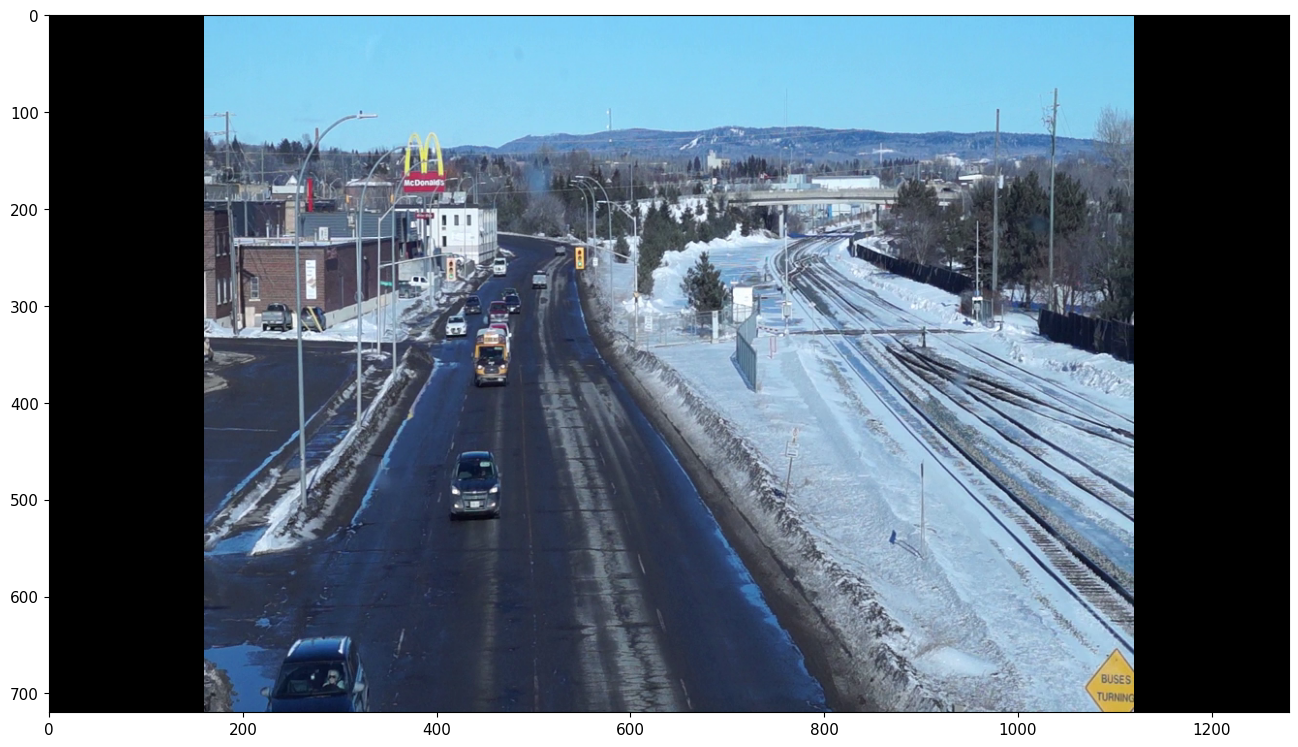

In [18]:
from PIL import Image
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)


%matplotlib inline
show_frame_in_notebook(frame, (16, 16))
img=Image.fromarray(frame, "RGB")
image_filename = r"C:\Users\param\ComputerVisionGithub\1st.jpeg"
img.save(image_filename)

In [ ]:
!pip install opencv-python

In [ ]:

import cv2

# Load the image
image = cv2.imread(r"C:\Users\param\ComputerVisionGithub\1st.jpeg")

# Create a copy of the image to draw on
image_copy = image.copy()

# Create a function to capture mouse events
def mouse_callback(event, x, y, flags, params):
    global point1, point2
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # Set the first point
        point1 = (x, y)
        
    elif event == cv2.EVENT_LBUTTONUP:
        # Set the second point
        point2 = (x, y)
        
        # Draw the line on the image
        cv2.line(image_copy, point1, point2, (0, 0, 255), thickness=2)
        
        # Show the image with the line
        cv2.imshow('Image with line', image_copy)

# Create a window to display the image
cv2.namedWindow('Image')

# Set the mouse callback function
cv2.setMouseCallback('Image', mouse_callback)

# Show the image
cv2.imshow('Image', image)

# Wait for the user to draw the line
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()

# Print the two points
print("Point 1: ", point1)
print("Point 2: ", point2)


In [ ]:
from supervision.geometry.dataclasses import Point
LINE_START = Point(250, 400)
LINE_END = Point(620, 400)

TARGET_VIDEO_PATH = f"{Home}/Output.mp4"

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
# create frame generator
from supervision.video.dataclasses import VideoInfo
from supervision.video.sink import VideoSink
video_info=VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
from tqdm import tqdm



# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

In [ ]:
# settings
